EJERCICIO 1.
Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:
Tabla de contingencia
Coeficiente de correlación de las variables numéricas del dataset.
Sesgos de alguna de las variables numéricas del dataset.
Intervalo de confianza de algunas de las variables numéricas del dataset 

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import skew

In [6]:
df = pd.read_csv("./ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [7]:
df.describe (include = object)

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


Tabla de contingencia

In [12]:
pd.crosstab(df["experience_level"], df["job_title"]).T

experience_level,EN,EX,MI,SE
job_title,,,,
3D Computer Vision Researcher,0,0,1,0
AI Scientist,4,0,2,1
Analytics Engineer,0,2,0,2
Applied Data Scientist,1,0,2,2
Applied Machine Learning Scientist,1,0,3,0
BI Data Analyst,2,1,3,0
Big Data Architect,0,0,0,1
Big Data Engineer,3,0,3,2
Business Data Analyst,2,0,3,0


Coeficiente de correlación de las variables numéricas del dataset.

In [13]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [15]:
np.corrcoef(df["work_year"],df["salary_in_usd"])


array([[1.        , 0.17049332],
       [0.17049332, 1.        ]])

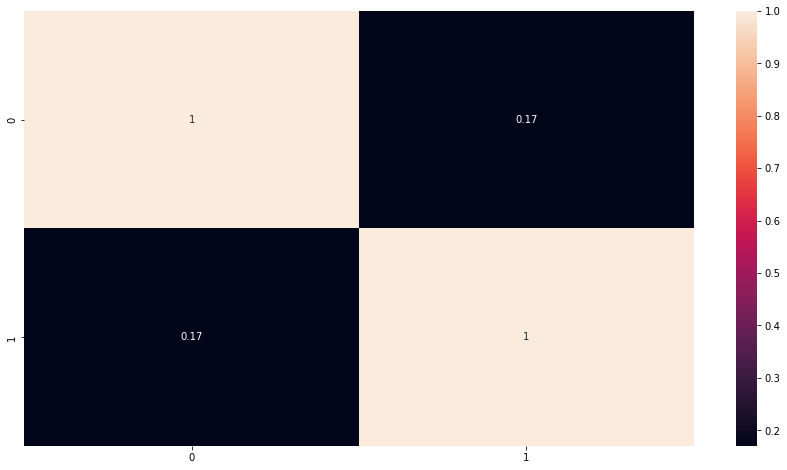

In [25]:
plt.figure (figsize = (15,8))

fig = sns.heatmap(np.corrcoef(df["work_year"],df["salary_in_usd"]), annot = True)

Sesgos de alguna de las variables numéricas del dataset.

In [26]:
skew(df["salary_in_usd"])
#Observamos que tenemos un sesgado positiva con "cola" a la derecha y concentración de datos a la izquierda

1.6634213360977623

/tmp/ipykernel_139630/2269466535.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  media = df.mean()
/tmp/ipykernel_139630/2269466535.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mediana = df.median()


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

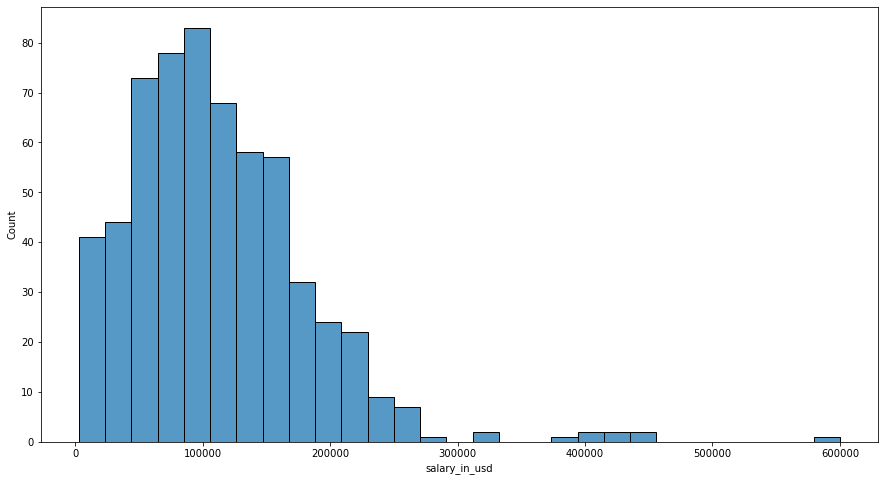

In [33]:
plt.figure (figsize = (15,8))
sns.histplot(x = "salary_in_usd", data = df)

media = df.mean()
mediana = df.median()
plt.axvline(media, color='red')
plt.axvline(mediana, color='orange')

EJERCICIO 2.
Interpretación de los resultados.
Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos. 